In [50]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
%pylab inline


    


In [13]:
puidata = os.getenv("PUIDATA")
if puidata is None:
    os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
    puidata = os.getenv("PUIDATA")

In [14]:
print(puidata)

/Users/anaemendezmendez/Documents/NYU_PHD/Fall_2018/PUI2018/PUIDATA


In [15]:
!curl https://data.cityofnewyork.us/resource/qiz3-axqb.json > collisions.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  857k    0  857k    0     0   857k      0 --:--:--  0:00:01 --:--:--  450k


In [16]:
!mv collisions.json $PUIDATA

In [17]:
!ls $PUIDATA

collisions.json      infant_mortality.csv
income.csv           nycdeaths.csv


In [18]:
collisions_nyc = pd.read_json("%s/collisions.json"%os.getenv("PUIDATA"))

In [21]:
collisions_nyc.columns

Index([':@computed_region_92fq_4b7q', ':@computed_region_efsh_h5xi',
       ':@computed_region_f5dn_yrer', ':@computed_region_sbqj_enih',
       ':@computed_region_yeji_bk3q', 'borough',
       'contributing_factor_vehicle_1', 'contributing_factor_vehicle_2',
       'contributing_factor_vehicle_3', 'contributing_factor_vehicle_4',
       'contributing_factor_vehicle_5', 'cross_street_name', 'date',
       'latitude', 'location', 'longitude', 'number_of_cyclist_injured',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed', 'number_of_pedestrians_injured',
       'number_of_pedestrians_killed', 'number_of_persons_injured',
       'number_of_persons_killed', 'off_street_name', 'on_street_name', 'time',
       'unique_key', 'vehicle_type_code1', 'vehicle_type_code2',
       'vehicle_type_code_3', 'vehicle_type_code_4', 'vehicle_type_code_5',
       'zip_code'],
      dtype='object')

In [74]:
collisions_nyc['date']

0     2018-09-15
1     2018-09-15
2     2018-09-15
3     2018-09-15
4     2018-09-15
5     2018-09-15
6     2018-09-15
7     2018-09-15
8     2018-09-15
9     2018-09-15
10    2018-09-15
11    2018-09-15
12    2018-09-15
13    2018-09-15
14    2018-09-15
15    2018-09-15
16    2018-09-15
17    2018-09-15
18    2018-09-15
19    2018-09-15
20    2018-09-15
21    2018-09-15
22    2018-09-15
23    2018-09-15
24    2018-09-15
25    2018-09-15
26    2018-09-15
27    2018-09-15
28    2018-09-15
29    2018-09-15
         ...    
970   2018-09-14
971   2018-09-14
972   2018-09-14
973   2018-09-14
974   2018-09-14
975   2018-09-14
976   2018-09-14
977   2018-09-14
978   2018-09-14
979   2018-09-14
980   2018-09-14
981   2018-09-14
982   2018-09-14
983   2018-09-14
984   2018-09-14
985   2018-09-14
986   2018-09-14
987   2018-09-14
988   2018-09-14
989   2018-09-14
990   2018-09-14
991   2018-09-14
992   2018-09-14
993   2018-09-14
994   2018-09-14
995   2018-09-14
996   2018-09-14
997   2018-09-

In [71]:
collisions_removed = collisions_nyc.drop(labels=[':@computed_region_92fq_4b7q',':@computed_region_efsh_h5xi', ':@computed_region_f5dn_yrer',':@computed_region_sbqj_enih',':@computed_region_yeji_bk3q','borough','contributing_factor_vehicle_1','contributing_factor_vehicle_2','contributing_factor_vehicle_3','contributing_factor_vehicle_4','contributing_factor_vehicle_5','cross_street_name', 'latitude','location','longitude','number_of_cyclist_injured','number_of_cyclist_killed','number_of_motorist_injured','number_of_motorist_killed', 'number_of_pedestrians_injured','number_of_pedestrians_killed','number_of_persons_killed','off_street_name','on_street_name','unique_key','time','vehicle_type_code1','vehicle_type_code2','vehicle_type_code_3','vehicle_type_code_4','vehicle_type_code_5','zip_code'], axis=1)

## Because in order for this data to make sense we need both the 'Year' and 'Maternal Race or Ethnicity' columns, I will keep both and make a plot for each race.

In [72]:
collisions_removed.head()

,date,number_of_persons_injured
0,2018-09-15,1
1,2018-09-15,0
2,2018-09-15,0
3,2018-09-15,0
4,2018-09-15,0


In [73]:
type(collisions_removed['date'][0])

pandas._libs.tslib.Timestamp

In [67]:
collisions_removed["date"] = collisions_removed["date"].apply(lambda x: pd.Timestamp(x))

In [68]:
collisions_removed

,date,number_of_persons_injured
0,2018-09-15,1
1,2018-09-15,0
2,2018-09-15,0
3,2018-09-15,0
4,2018-09-15,0
5,2018-09-15,0
6,2018-09-15,0
7,2018-09-15,0
8,2018-09-15,0
9,2018-09-15,2


Text(0,0.5,'Number of persons injured')

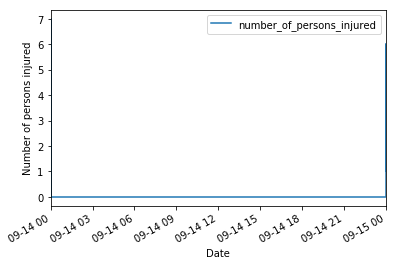

In [78]:
ax = collisions_removed.plot(x='date', y='number_of_persons_injured')
ax.set_xlabel('Date')
ax.set_ylabel('Number of persons injured')
